<a href="https://colab.research.google.com/github/utkarshrajdev/Linear-regression/blob/main/23_linear_regression_from_scratch_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>Linear Regression from Scratch using Python</h1></center><br>


![](https://www.biomedware.com/files/documentation/spacestat/Statistics/Multivariate_Modeling/Regression/regression_line.png)

In this notebook I will try to implement Linear Regression for prediction without relying to Python's easy-to-use scikit-learn library. This notebook aims to create a Linear Regression model without the help of in-built Linear Regression libraries to help us fully understand how it works behind the scene.
<br>**Beware: Mathematical mumbo-jumbos are present in this notebook**

## Introduction : Linear Regression

Linear Regression is the oldest, most simple, and widely used supervised machine learning algorithm for analysis. This is basically the starting point of every aspiring data scientist (that includes yours truly). In technical terms, LR is a linear approach to modelling the relationship between a dependent variable and one independent variables.

### Prerequisites
Before going any further I am assuming that you have atleast the very basic knowledge regarding the following items, if not then you might want to read a little.
1. Python programming
2. Basic Algebra
3. Basic Statistics (Statiscial terms, e.g., Independent variable, Dependent, etc.)



In [ ]:
# import python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import time

### Objectives
Througout this whole "tutorial" you/we should be able to achieve the following:
 - To understand the theory behind Linear Regression (Mathematical part)
 - To be able to create a Simple Linear Regression model without using built-in Machine Learning libraries.
 - To implement our Linear Regression model for predicting the price of a car in our automobile dataset (Analytics use case)

### Linear Regression demystified

Before we get our hands dirty on coding our Linear Regression let us first get to know the underlying operations in a Linear Regression. The following cells are aiming to explain the mathematics behind this legendary algorithm for us to accomplish our very first objective (stated above). So, how does it work? Basically, Linear regression is a method used to define, to measure a relationship between a dependent variable (Y) and independent variable (X). Linear Regression predicts a target variable by estimating a line that best fits the linear relationship between X and Y<br> **Note: A dependent variable is sometimes called outcome variable, sometimes response variable**<br>
Linear equation is defined as below:

$$
Y = \beta_{0} + \beta_{1}X
$$

Where
 - Y is the dependent/outcome/response variable
 - $ \beta_{0} $ is the Y intercept
 - $ \beta_{1} $ is the slope intercept

In python code:

In [ ]:
def linear(X, b0, b1):
    return [b0+b1*x for x in X]

#### Ordinary Least Squares

$ \beta_{0} $ and $ \beta_{1} $ are estimated from the training data. The $ \beta_{1} $ is called a scale factor or coefficient and $ \beta_{0} $ is called bias coefficient. They are tweaked to find the best fitting line between our variables. We will estimate these coefficients using a method called the<a src = "https://www.wikiwand.com/en/Ordinary_least_squares"> Ordinary Least Squares.</a><br>
Its definition are as follows:

\begin{align}
\beta_{0} = \bar y - \beta_{1}\bar x
\end{align}
<center>Intercept</center>
<br>

\begin{align}
\beta_{1} = \frac{\sum_{i=1}^n(x_{i} - \bar x)(y_{i} - \bar y)}{\sum_{i=1}^n(x_{i} - \bar x)^2}
\end{align}
<center>Co-efficient (Slope)</center>

Where
 - $ \bar y $ is the mean of the dependent/outcome/response variable
 - $ \beta_{1} $ is the slope intercept (Defined below)
 - $ \bar x $ is the mean of the independent variable

To simplify the slope equation above:

\begin{align}
\beta_{1} = \frac{\sum rise}{\sum run}
\end{align}

In python code:

In [ ]:
# b0 - Intercept
def intercept(X, Y, b1):
    x_ = np.mean(X)
    y_ = np.mean(Y)

    return y_-b1*x_

In [ ]:
# b1 - Slope
def slope(X, Y):
    x_ = np.mean(X)
    y_ = np.mean(Y)

    rise = sum([(x-x_) * (y-y_) for x,y in zip(X,Y)])
    run = sum([(x-x_)**2 for x,y in zip(X,Y)])

    return rise / run

Still there? You're doing great. We have now created our Linear Regression model the next section will go step-by-step on how to apply our newly created model into a real dataset.

### Linear Regression, up and running

In [ ]:
data = pd.read_csv("Automobile_data.csv")
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


We will use the <a src="https://www.kaggle.com/toramky/automobile-dataset">Automobile dataset</a> to test out our Linear Regression model. For this particular use case we will predict the price column in our dataset. Then later on we will evaluate the performance of our linear regression. Hopefully it will not suck that much. First thing we have to do is explore the data that we have to find some patterns or some anomalies in our data so that we can apply appropriate steps to handle it but we will not be dwelling to much on data exploration, that is not our goal for today.

#### Exploratory data analysis

First things is to know how big of a data we're going to deal with.

In [ ]:
print("Dataset size")
print("Rows {} Columns {}".format(data.shape[0], data.shape[1]))

Dataset size
Rows 205 Columns 26


In [ ]:
print("Columns and data types")
pd.DataFrame(data.dtypes).rename(columns = {0:'dtype'})

Columns and data types


,dtype
symboling,int64
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


That's a lot of columns, since we are using Linear Regression which can only deal with TWO variables, as defined above, we will only select two columns: **price** and a column that we will know later on.

In [ ]:
data['price'].value_counts()[:5]

?        4
7775     2
18150    2
7609     2
16500    2
Name: price, dtype: int64

Eureka! the error was cause by a '?' value in the **price** column. To simplify things we will just remove those rows to prevent further inconvenience.

In [ ]:
data = data.loc[data['price']!='?']
data[['price']] = data[['price']].astype(int)

Let's now decide which variable to use as our independent variable. One easy thing to do is by correlation. The most correlated variable to **price** will be our independent variable.

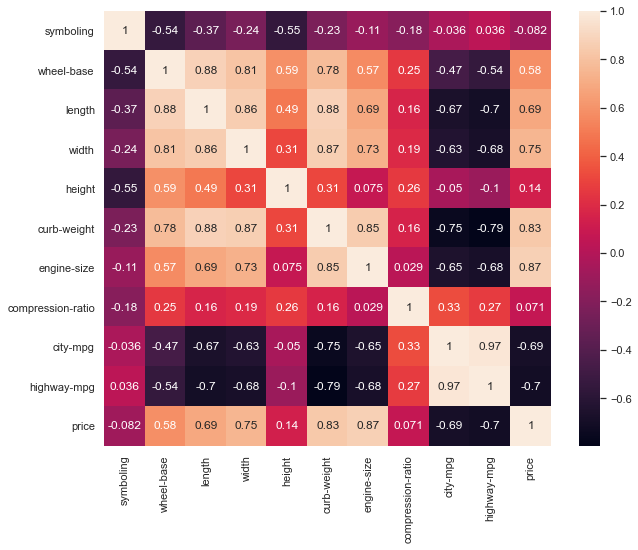

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

**engine-size** has the highest correlation with **price** let us use that column.

In [ ]:
final_data = data[['engine-size', 'price']]
predictor = data['engine-size']
target = data['price']

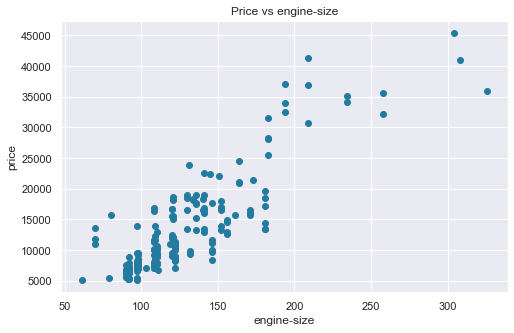

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Price vs engine-size")
plt.scatter(predictor, target, color = "#247ba0")
plt.xlabel('engine-size')
plt.ylabel('price')
plt.show()

Above is our data points. We will now fit our linear regression line in those data points

#### Prediction

In [ ]:
b1 = slope(predictor, target)
b0 = intercept(predictor, target, b1)
predicted = linear(predictor, b0, b1)
# print(predicted) - Uncomment to see predicted values

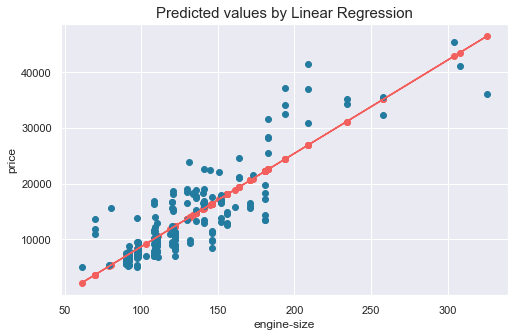

In [ ]:
plt.figure(figsize = (8, 5))
plt.plot(predictor, predicted, color = '#f25f5c')
plt.scatter(predictor, predicted, color = '#f25f5c')
plt.title('Predicted values by Linear Regression', fontsize = 15)
plt.xlabel('engine-size')
plt.ylabel('price')
plt.scatter(predictor, target, color = "#247ba0")
plt.show()

In [ ]:
print("Coefficients:\n=============")
print("b0 : ", b0)
print("b1 : ", b1)

Coefficients:
b0 :  -7963.338906281075
b1 :  166.8600156914162


The red line above is our predicted values, it is the "line that best fits the data". Our linear regression prediction is done the next thing we're going to do is to evaluate how well does this regression line fits our data.

#### Evaluation

After prediction a data scientist should always show how was the performance of the model using different evaluation metrics. One of the most important evaluation metric for linear regression is the coefficient of determination also known as R-squared value ($ R^2 $). The $ R^2 $ is basically a statistical measure of how close the data are to the fitted regression line, by "data" it means our independent variable data, the **engine-size** data. Usually, the larger the $R^2$ value is, the better the model fits the data.

$ R^2 $ is defined as :

\begin{align}
r^2 = \frac{SS_{regression}}{SS_{total}}
\end{align}

\begin{align}
r^2 = 1 - \frac{SS_{error}}{SS_{total}}
\end{align}

Where:
 - $ SS_{regression} $ - "regression sum of squares"; quantifies how far the predicted value is from the mean
 - $ SS_{error} $ - "error sum of squares"; quantifies the variance of the target data points around the regression line
 - $ SS_{total} $ - "total sum of squares"; quantifies the variance of the target data points around the mean

\begin{align}
SS_{regression} = \sum_{i=1}^m(\hat y_i - \bar y)^2
\end{align}

\begin{align}
SS_{error} = \sum_{i=1}^m(y_i - \hat y)^2
\end{align}

\begin{align}
SS_{total} = \sum_{i=1}^m(y_i - \bar y)^2
\end{align}

In python code:

In [ ]:
def r_squared(Y, Y_HAT):
    ssr, sse, r_sqr = [0]*3
    y_ = np.mean(Y)
#     ssr = sum([(y_hat - y_)**2 for y_hat in Y_HAT])
    sse = sum([(y - y_hat)**2 for y,y_hat in zip(Y, Y_HAT)])
    sst = sum([(y - y_)**2 for y in Y])

    r_sqr = 1 - (sse / sst)

    return r_sqr


In [ ]:
r_squared(target, predicted)

0.7609686443622008

76% not bad for a LR model from scratch.

For comparison I will implement linear regression using python's scikit-learn library.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
predictor = np.array(predictor).reshape((-1, 1))
reg = reg.fit(predictor, target)

Y_pred = reg.predict(predictor)
r2_score = reg.score(predictor, target)
print(r2_score)

0.7609686443622008


Same $r^2$

## Summary and Conclusion

In this kernel, we've created the simplest Linear Regression model you could ever imagine, using Python. We've also understood the mathematics that is happening behind our model. Using one predictor variable and target variable we've implemented our Linear Regression model in a simple analytics use case, that is predicting the price of a car based on it's engine size. Evaluation shows that our linear regression performs exactly the same as sklearn's Linear Regression model, which is nice.

To wrap things up let us look back to the objectives we've set at the beggining of this kernel and see if we've accomplished them. The first objective was to understand the theory behind Linear Regression. A couple of mathematical equations here and there, hopefully you were able to learn those mathematical and statistical mumbo-jumbo I have discussed in the section **Linear Regression demistyfied**. The second objective was to create a Simple Linear Regression model without using built-in ML libraries. Using python and some helper libraries (pandas and numpy) we were able to accomplish our second objective in the section **Linear Regression, up and running**. In the same section, we've also implemented our model to a simple analytics use case which answers our third objective.


This linear regression implementation would probably be never used in production and it is unlikely that it will defeat sklearn's own LinearRegression module, however the goal of this kernel was to understand intrecately the structure of different algorithms, in this case, Linear Regression. This kernel helps me as much as it helps you. If you liked this kernel please leave an upvote, and please, do check-out my other "from scratch" kernels. thank you .


## References